In [18]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from collections import Counter
import datetime

# Ignore replce() FutureWarning.
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [19]:
df = pd.read_csv('supermarket_sales.csv')
df.sample(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
571,343-61-3544,B,Mandalay,Member,Male,Sports and travel,26.67,10,13.335,280.035,1/29/2019,11:48,Cash,266.70,4.761905,13.335,8.6
673,556-41-6224,C,Naypyitaw,Normal,Male,Health and beauty,33.64,8,13.456,282.576,2/15/2019,17:10,Credit card,269.12,4.761905,13.456,9.3
947,676-10-2200,B,Mandalay,Member,Male,Fashion accessories,53.78,1,2.689,56.469,2/3/2019,20:13,Ewallet,53.78,4.761905,2.689,4.7


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [22]:
# Descriptive statistics
df.describe().T

# Estimates = df.describe()
# Estimates.loc['Trimmed Mean'] = stats.trim_mean(df, 0.1)
# Estimates.loc['Median'] = df.median()
# Estimates.loc['Skewness'] = df.skew()
# Estimates.loc['Kurtosis'] = df.kurtosis()
# Estimates.loc['IQR'] = df.quantile(0.75) - df.quantile(0.25)

# unwanted_metrics = ['count', 'min', 'max',]
# #Dropping unwanted default metrics
# Estimates.drop(unwanted_metrics, inplace=True, axis=0)
# Estimates


,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


In [ ]:
#Categorize the entire dataset based on product line.
new=df.groupby('Product line')

#Displaying the grouped Dataframe without aggregation
for group_name, group_data in new:
    print('Group: ', group_name)
    print(group_data)


Group:  Electronic accessories
      Invoice ID Branch       City Customer type  Gender  \
1    226-31-3081      C  Naypyitaw        Normal  Female   
5    699-14-3026      C  Naypyitaw        Normal    Male   
6    355-53-5943      A     Yangon        Member  Female   
11   529-56-3974      B   Mandalay        Member    Male   
12   365-64-0515      A     Yangon        Normal  Female   
..           ...    ...        ...           ...     ...   
978  156-20-0370      B   Mandalay        Normal  Female   
984  189-40-5216      C  Naypyitaw        Normal    Male   
988  267-62-7380      C  Naypyitaw        Member    Male   
992  745-74-0715      A     Yangon        Normal    Male   
994  652-49-6720      C  Naypyitaw        Member  Female   

               Product line  Unit price  Quantity   Tax 5%     Total  \
1    Electronic accessories       15.28         5   3.8200   80.2200   
5    Electronic accessories       85.39         7  29.8865  627.6165   
6    Electronic accessories     

# Aggregation, Transformation, Filtration

In [ ]:
# Aggregration to obtain a summary structure for further statistical analysis.
# Grouping by both gender and product line and calculating the mean shopping amount

average_shopping_amount = df.groupby(['Gender', 'Product line'])['Total'].mean().unstack()
average_shopping_amount


Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,322.643125,317.056250,368.565750,290.015414,380.213639,324.712739
Male,316.691965,291.079207,273.499125,348.099460,294.136241,340.360327


In [ ]:
#Filtering, in a case where we want to see the product lines which have an average shopping value of 300.
average_shopping_amount = df.groupby(['Gender', 'Product line'])['Total'].mean().unstack()
average_shopping_amount = average_shopping_amount[average_shopping_amount > 300]
average_shopping_amount

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,322.643125,317.05625,368.56575,NaN,380.213639,324.712739
Male,316.691965,NaN,NaN,348.09946,NaN,340.360327


In [ ]:
# The transform() function in pandas is used to perform group-specific calculations and return a DataFrame that is the same shape as the original input.
# Defining a function to calculate mean shopping amount for each group
def mean_shopping_amount(group):
    return group.mean()

#Grouping by both gender and product line and transforming the 'Total' column, with the mean shopping amount for each group
df['Mean Shopping Amount'] = df.groupby(['Gender', 'Product line'])['Total'].transform(mean_shopping_amount)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,year,month,Mean Shopping Amount
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,290.015414
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,322.643125
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,294.136241
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,348.099460
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,340.360327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2019,1,348.099460
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2019,3,380.213639
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,2019,2,273.499125
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,2019,2,294.136241


In [ ]:
df.groupby('Product line').size()

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
dtype: int64

# Branch Performance in terms of total sales

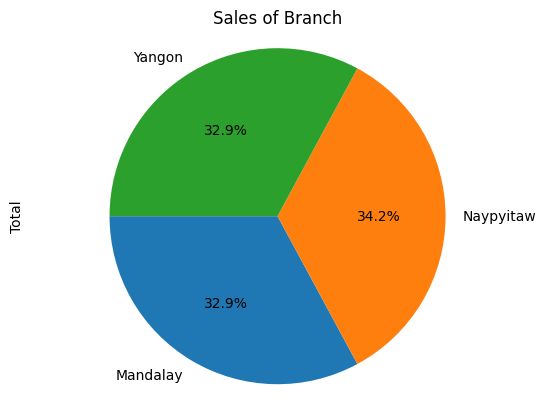

In [ ]:
city_branch = df.groupby('City')['Total'].sum()
city_branch

#Visualize
#colors = ['#3B979B','#ACB292', '#C49F7D']
ax = city_branch.plot(kind='pie', autopct='%1.1f%%', startangle=180)
ax.axis('equal')

plt.title('Sales of Branch')
plt.show()

# The product line that contributes the most to revenue

In [ ]:
product_line = df.groupby('Product line')['Total'].sum().sort_values().reset_index()
product_line.columns = ['Product line','Total sale']
product_line

fig = px.bar(product_line, x='Total sale', y='Product line', color='Total sale', orientation='h')
fig.update_layout(
    title='Sales of Product Lines',
    width=700,
    height=500
)
fig.show()

In [ ]:
ProductRating = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)

col = {
    'Product' : ProductRating.index,
    'Ratings' : ProductRating.values
}
ProductRating = pd.DataFrame(col)

fig = px.bar(ProductRating, x='Ratings', y='Product', title='Product Line Average Ratings', color="Ratings", orientation='h')
fig.show()

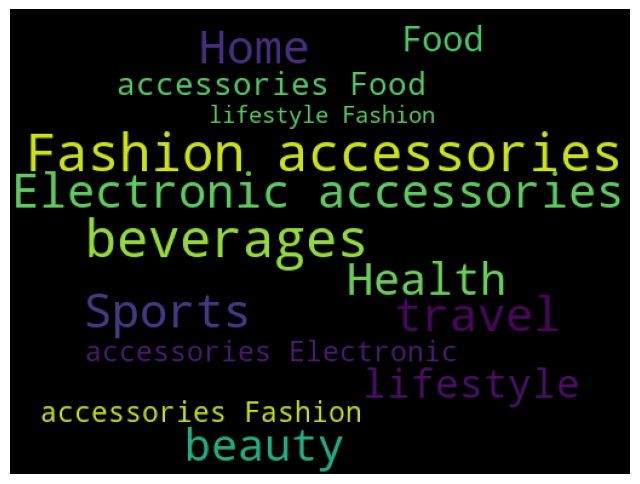

In [24]:
from wordcloud import WordCloud
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
    background_color='black',
    width=512,
    height=384
).generate(' '.join(df['Product line']))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

# Peak Months and Hours

In [ ]:
#Parsing date
df['Date'] = pd.to_datetime(df['Date'])

# Add a year column
df['year'] = df['Date'].dt.year
df['year'].unique()

#Add a month column
df['month'] = df['Date'].dt.month
df['month'].unique()

# Add a day column
df['day'] = df['Date'].dt.day
df['day'].unique()

array([ 5,  8,  3, 27, 25, 24, 10, 20,  6,  9, 12,  7, 29, 15, 11,  1, 21,
       17,  2, 22, 28, 23,  4, 16, 19, 14, 13, 26, 18, 30, 31])

In [ ]:
df.sample(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,year,month,Mean Shopping Amount,day
898,725-54-0677,C,Naypyitaw,Member,Male,Health and beauty,85.6,7,29.96,629.16,...,13:50,Cash,599.2,4.761905,29.96,5.3,2019,3,348.09946,2
267,571-94-0759,B,Mandalay,Member,Female,Food and beverages,74.6,10,37.30,783.30,...,20:55,Cash,746.0,4.761905,37.30,9.5,2019,1,368.56575,8


In [ ]:
import plotly.graph_objects as go


In [ ]:
observe_trends = df.groupby('month')['Total'].sum().reset_index()

#Visualizations
fig = go.Figure()

#Bar
fig.add_trace(go.Bar(
    x=observe_trends['month'],
    y=observe_trends['Total'],
    name='Total Sales',
    marker_color='springgreen',
    width=0.3
))

#line
fig.add_trace(go.Scatter(
    x=observe_trends['month'],
    y=observe_trends['Total'],
    name = 'Trend Line',
    mode = 'lines+markers',
    line=dict(color='yellowgreen', width=1.5)
))

#Layouts
fig.update_layout(
    title ='Sales by Month',
    width = 700,
    height = 500,
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['January', 'February', 'March'],
        title='Month'
    ),
    yaxis=dict(title='Total Sales')
)

Text(0.5, 1.0, 'Percentage of Payment Methods')

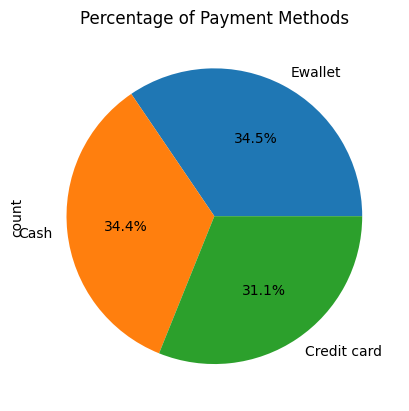

In [ ]:
df["Payment"].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Percentage of Payment Methods")

In [ ]:
# Parsing Time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

#Extracting Hours
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

#Sales for each hour
hourly_sales = df.groupby('Hour')['Total'].sum()

#Transactions counts each hour
hourly_transactions = df.groupby('Hour').size()

#Creating subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

#Sales each hour
hourly_sales.plot(kind='bar', ax=ax[0], color='seagreen')
ax[0].set_title('Hourly Sales Total')
ax[0].set_xlabel('Hour of The Day')
ax[0].set_ylabel('Total Sales')

#Transaction counts each hour
hourly_sales.plot(kind='bar', ax=ax[1], color='seagreen')
ax[1].set_title('Hourly Transactions')
ax[1].set_xlabel('Hour of the Day')
ax[1].set_ylabel('Number of Transactions')

plt.tight_layout()
plt.show()


ValueError: unconverted data remains when parsing with format "%H:%M": ":00", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

# Customer Behavior

Text(0.5, 1.0, 'Total Sales by Gender')

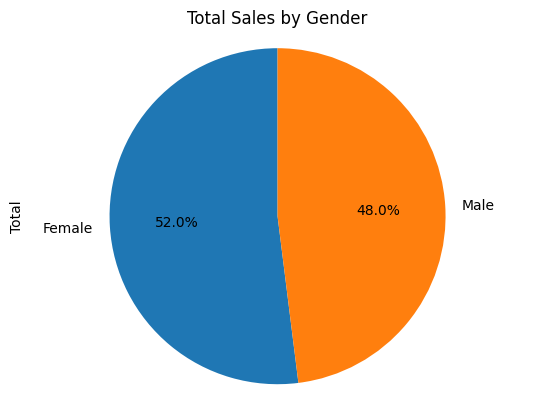

In [ ]:
# Gender
gender_sales = df.groupby('Gender')['Total'].sum()
gender_sales

#Visualization
ax = gender_sales.plot(kind ='pie', autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Total Sales by Gender')

In [ ]:
#Product Line by Gender
gender = df.groupby(['Product line','Gender']).size().reset_index()
gender.columns = ['Product line','Gender','Count']
gender

#Grouped bar chart
fig = px.bar(gender, x = 'Product line', y = 'Count', color ='Gender',barmode ='group')

#layouts
fig.update_layout(
    height=500,
    width=900,
    title = 'Product line by Gender'
)
fig.show()

Text(0.5, 1.0, 'Total Sales by Customer Type')

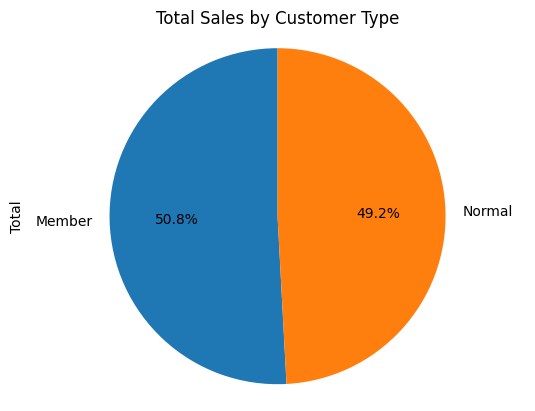

In [ ]:
# Customer Type (Member or Normal)
customer_type = df.groupby('Customer type')['Total'].sum()
customer_type

ax = customer_type.plot(kind='pie', autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Total Sales by Customer Type')


In [ ]:
# Product line by Customer Type
customer = df.groupby(['Product line','Customer type']).size().reset_index()
customer.columns=['Product line', 'Customer type', 'Count']

#Grouped bar chart
fig =px.bar(customer, x = 'Product line', y='Count', color='Customer type', barmode='group')

#layouts
fig.update_layout(
    height = 500,
    width = 900,
    title = 'Product Line by Customer Type'
)